# 📦 Import Libraries

In [182]:
import os
import time

import numpy  as np
import pandas as pd

In [183]:
import folium

import matplotlib        as mpl
import matplotlib.pyplot as plt
import seaborn           as sns

from matplotlib.colors import LinearSegmentedColormap

In [184]:
from datetime import datetime, date
from datetime import timedelta

from utils.data_acquisition import *
from utils.data_preprocessing import *
from utils.data_visualize import *
from utils.teda import TEDADetect

teda_detect = TEDADetect()

In [185]:
plot_size = (18, 10)

graph_colors = {
  "black": "#1F1E1F",
  "blue": "#03A9CE",
  "white": "#F7F7F7",
}

text_colors = {
  "title": "#262626",
  "subtitle": "#646464",
}

fig_path = "./figures/"

if not os.path.exists(fig_path):
    os.makedirs(fig_path)

# 💾 Data Acquisition

In [186]:
DATA_PATH = "./data/"

GASOLINE_DATA_PATH = DATA_PATH + "[Gasolina] Trajeto Casa-Escola-UFRN/"
ETHANOL_DATA_PATH = DATA_PATH + "[Etanol] Trajeto Casa-Escola-UFRN/"

GASOLINE_DATA_PATHS = get_list_paths(GASOLINE_DATA_PATH)
ETHANOL_DATA_PATHS = get_list_paths(ETHANOL_DATA_PATH)

In order to perform a proper comparison, it is necessary to select data from a week of activity for each type of fuel, ensuring that the data is somewhat similar. This means choosing records with the same day of the week and a similar number of rows, which is directly related to the duration of the trip.

In [187]:
data_info_gasoline = get_data_info(GASOLINE_DATA_PATH)
data_info_ethanol  = get_data_info(ETHANOL_DATA_PATH)

In [188]:
gasoline_paths = {}
ethanol_paths  = {}

And another criterion is the amount of data. To have a sufficient quantity for analysis, we have chosen a minimum of 2000 rows.

### Monday

In [189]:
monday_gasoline = data_info_gasoline.query("WEEK_DAY == 'SEG' & ROWS >= 2000").sort_values(by="ROWS", ascending=False)

monday_gasoline

,PATH,WEEK_DAY,ROWS
28,./data/[Gasolina] Trajeto Casa-Escola-UFRN/tra...,SEG,2285
34,./data/[Gasolina] Trajeto Casa-Escola-UFRN/tra...,SEG,2205


In [190]:
monday_ethanol = data_info_ethanol.query("WEEK_DAY == 'SEG' & ROWS >= 2000").sort_values(by="ROWS", ascending=False)

monday_ethanol

,PATH,WEEK_DAY,ROWS
12,./data/[Etanol] Trajeto Casa-Escola-UFRN/track...,SEG,2649
0,./data/[Etanol] Trajeto Casa-Escola-UFRN/track...,SEG,2237
7,./data/[Etanol] Trajeto Casa-Escola-UFRN/track...,SEG,2232


In [191]:
select_by_similarity(monday_gasoline["ROWS"].values, monday_ethanol["ROWS"].values)

Differece: 27


[2205, 2232]

By similarity, we choose indexes:
- Gasoline: 34
- Ethanol:  7

The difference is 27 rows

In [192]:
gasoline_paths["MON"] = monday_gasoline.loc[34, "PATH"]
ethanol_paths["MON"]  = monday_ethanol.loc[7, "PATH"]

### Tuesday

In [193]:
tuesday_gasoline = data_info_gasoline.query("WEEK_DAY == 'TER' & ROWS >= 2000").sort_values(by="ROWS", ascending=False)

tuesday_gasoline

,PATH,WEEK_DAY,ROWS
36,./data/[Gasolina] Trajeto Casa-Escola-UFRN/tra...,TER,2269
25,./data/[Gasolina] Trajeto Casa-Escola-UFRN/tra...,TER,2242
13,./data/[Gasolina] Trajeto Casa-Escola-UFRN/tra...,TER,2132
29,./data/[Gasolina] Trajeto Casa-Escola-UFRN/tra...,TER,2099
20,./data/[Gasolina] Trajeto Casa-Escola-UFRN/tra...,TER,2054
2,./data/[Gasolina] Trajeto Casa-Escola-UFRN/tra...,TER,2050


In [194]:
tuesday_ethanol = data_info_ethanol.query("WEEK_DAY == 'TER' & ROWS >= 2000").sort_values(by="ROWS", ascending=False)

tuesday_ethanol

,PATH,WEEK_DAY,ROWS
13,./data/[Etanol] Trajeto Casa-Escola-UFRN/track...,TER,2474
1,./data/[Etanol] Trajeto Casa-Escola-UFRN/track...,TER,2303
18,./data/[Etanol] Trajeto Casa-Escola-UFRN/track...,TER,2161


In [195]:
select_by_similarity(tuesday_gasoline["ROWS"].values, tuesday_ethanol["ROWS"].values)

Differece: 29


[2132, 2161]

By similarity, we choose indexes:
- Gasoline: 13
- Ethanol:  18

The difference is 29 rows

In [196]:
gasoline_paths["TUE"] = tuesday_gasoline.loc[13, "PATH"]
ethanol_paths["TUE"]  = tuesday_ethanol.loc[18, "PATH"]

### Wednesday

In [197]:
wednesday_gasoline = data_info_gasoline.query("WEEK_DAY == 'QUA' & ROWS >= 2000").sort_values(by="ROWS", ascending=False)

wednesday_gasoline

,PATH,WEEK_DAY,ROWS
19,./data/[Gasolina] Trajeto Casa-Escola-UFRN/tra...,QUA,2227
37,./data/[Gasolina] Trajeto Casa-Escola-UFRN/tra...,QUA,2072
10,./data/[Gasolina] Trajeto Casa-Escola-UFRN/tra...,QUA,2057


In [198]:
wednesday_ethanol = data_info_ethanol.query("WEEK_DAY == 'QUA' & ROWS >= 2000").sort_values(by="ROWS", ascending=False)

wednesday_ethanol

,PATH,WEEK_DAY,ROWS
9,./data/[Etanol] Trajeto Casa-Escola-UFRN/track...,QUA,2144
2,./data/[Etanol] Trajeto Casa-Escola-UFRN/track...,QUA,2064


In [199]:
select_by_similarity(wednesday_gasoline["ROWS"].values, wednesday_ethanol["ROWS"].values)

Differece: 7


[2057, 2064]

By similarity, we choose indexes:
- Gasoline: 10
- Ethanol:  2

The difference is 7 rows

In [200]:
gasoline_paths["WED"] = wednesday_gasoline.loc[10, "PATH"]
ethanol_paths["WED"]  = wednesday_ethanol.loc[2, "PATH"]

### Thursday

In [201]:
thursday_gasoline = data_info_gasoline.query("WEEK_DAY == 'QUI' & ROWS >= 2000").sort_values(by="ROWS", ascending=False)

thursday_gasoline

,PATH,WEEK_DAY,ROWS
15,./data/[Gasolina] Trajeto Casa-Escola-UFRN/tra...,QUI,2489
26,./data/[Gasolina] Trajeto Casa-Escola-UFRN/tra...,QUI,2205
38,./data/[Gasolina] Trajeto Casa-Escola-UFRN/tra...,QUI,2180
8,./data/[Gasolina] Trajeto Casa-Escola-UFRN/tra...,QUI,2179
3,./data/[Gasolina] Trajeto Casa-Escola-UFRN/tra...,QUI,2172
31,./data/[Gasolina] Trajeto Casa-Escola-UFRN/tra...,QUI,2027
22,./data/[Gasolina] Trajeto Casa-Escola-UFRN/tra...,QUI,2021


In [202]:
thursday_ethanol = data_info_ethanol.query("WEEK_DAY == 'QUI' & ROWS >= 2000").sort_values(by="ROWS", ascending=False)

thursday_ethanol

,PATH,WEEK_DAY,ROWS
15,./data/[Etanol] Trajeto Casa-Escola-UFRN/track...,QUI,2354
10,./data/[Etanol] Trajeto Casa-Escola-UFRN/track...,QUI,2312
5,./data/[Etanol] Trajeto Casa-Escola-UFRN/track...,QUI,2274
3,./data/[Etanol] Trajeto Casa-Escola-UFRN/track...,QUI,2143


In [203]:
select_by_similarity(thursday_gasoline["ROWS"].values, thursday_ethanol["ROWS"].values)

Differece: 29


[2172, 2143]

By similarity, we choose indexes:
- Gasoline: 3
- Ethanol:  3

The difference is 29 rows

In [204]:
gasoline_paths["THU"] = thursday_gasoline.loc[3, "PATH"]
ethanol_paths["THU"]  = thursday_ethanol.loc[3, "PATH"]

### Friday

In [205]:
friday_gasoline = data_info_gasoline.query("WEEK_DAY == 'SEX' & ROWS >= 2000").sort_values(by="ROWS", ascending=False)

friday_gasoline

,PATH,WEEK_DAY,ROWS
27,./data/[Gasolina] Trajeto Casa-Escola-UFRN/tra...,SEX,2218
9,./data/[Gasolina] Trajeto Casa-Escola-UFRN/tra...,SEX,2184
16,./data/[Gasolina] Trajeto Casa-Escola-UFRN/tra...,SEX,2072
12,./data/[Gasolina] Trajeto Casa-Escola-UFRN/tra...,SEX,2015


In [206]:
friday_ethanol = data_info_ethanol.query("WEEK_DAY == 'SEX' & ROWS >= 2000").sort_values(by="ROWS", ascending=False)

friday_ethanol

,PATH,WEEK_DAY,ROWS
11,./data/[Etanol] Trajeto Casa-Escola-UFRN/track...,SEX,2233
6,./data/[Etanol] Trajeto Casa-Escola-UFRN/track...,SEX,2221
16,./data/[Etanol] Trajeto Casa-Escola-UFRN/track...,SEX,2110


In [207]:
select_by_similarity(friday_gasoline["ROWS"].values, friday_ethanol["ROWS"].values)

Differece: 3


[2218, 2221]

By similarity, we choose indexes:
- Gasoline: 27
- Ethanol:  6

The difference is 3 rows

In [208]:
gasoline_paths["FRI"] = friday_gasoline.loc[27, "PATH"]
ethanol_paths["FRI"]  = friday_ethanol.loc[6, "PATH"]

### Selected Data

| Fuel     | Week Day  | Date        |
|:--------:|:---------:|:-----------:|
| Gasoline | Monday    | 2022-Oct-31 |
| Ethanol  | Monday    | 2023-Feb-27 |
| Gasoline | Tuesday   | 2022-Nov-22 |
| Ethanol  | Tuesday   | 2023-Mar-14 |
| Gasoline | Wednesday | 2022-Nov-16 |
| Ethanol  | Wednesday | 2023-Feb-15 |
| Gasoline | Thursday  | 2022-Nov-03 |
| Ethanol  | Thursday  | 2023-Feb-16 |
| Gasoline | Friday    | 2022-Oct-31 |
| Ethanol  | Friday    | 2023-Feb-24 |

#### Gasoline

In [209]:
gasoline_paths

{'MON': './data/[Gasolina] Trajeto Casa-Escola-UFRN/trackLog-2022-Oct-31_06-36-58_seg.csv',
 'TUE': './data/[Gasolina] Trajeto Casa-Escola-UFRN/trackLog-2022-Nov-22_06-34-32_ter.csv',
 'WED': './data/[Gasolina] Trajeto Casa-Escola-UFRN/trackLog-2022-Nov-16_06-39-10_qua.csv',
 'THU': './data/[Gasolina] Trajeto Casa-Escola-UFRN/trackLog-2022-Nov-03_06-35-20_qui.csv',
 'FRI': './data/[Gasolina] Trajeto Casa-Escola-UFRN/trackLog-2022-Oct-14_06-41-57_sex.csv'}

In [210]:
monday_gasoline    = pd.read_csv(gasoline_paths["MON"])
tuesday_gasoline   = pd.read_csv(gasoline_paths["TUE"])
wednesday_gasoline = pd.read_csv(gasoline_paths["WED"])
thursday_gasoline  = pd.read_csv(gasoline_paths["THU"])
friday_gasoline    = pd.read_csv(gasoline_paths["FRI"])

#### Ethanol

In [211]:
ethanol_paths

{'MON': './data/[Etanol] Trajeto Casa-Escola-UFRN/trackLog-2023-Feb-27_06-41-02_seg.csv',
 'TUE': './data/[Etanol] Trajeto Casa-Escola-UFRN/trackLog-2023-Mar-14_06-39-58_ter.csv',
 'WED': './data/[Etanol] Trajeto Casa-Escola-UFRN/trackLog-2023-Feb-15_06-39-28_qua.csv',
 'THU': './data/[Etanol] Trajeto Casa-Escola-UFRN/trackLog-2023-Feb-16_06-32-36_qui.csv',
 'FRI': './data/[Etanol] Trajeto Casa-Escola-UFRN/trackLog-2023-Feb-24_06-41-36_sex.csv'}

In [212]:
monday_ethanol    = pd.read_csv(ethanol_paths["MON"])
tuesday_ethanol   = pd.read_csv(ethanol_paths["TUE"])
wednesday_ethanol = pd.read_csv(ethanol_paths["WED"])
thursday_ethanol  = pd.read_csv(ethanol_paths["THU"])
friday_ethanol    = pd.read_csv(ethanol_paths["FRI"])

# 🧩 Data Modelling

In [213]:
SELECTED_COLUMNS = [
  "DeviceTime",
  "Latitude",
  "Longitude",
  "Speed(OBD)(km/h)",
  "AirFuelRatio(Commanded)(:1)",
  "MassAirFlowRate(g/s)"
]

## Gasoline

To compare on the same amount of data, we reduce the data to 2000

In [214]:
monday_gasoline    = monday_gasoline.iloc[:2000, :]
tuesday_gasoline   = tuesday_gasoline.iloc[:2000, :]
wednesday_gasoline = wednesday_gasoline.iloc[:2000, :]
thursday_gasoline  = thursday_gasoline.iloc[:2000, :]
friday_gasoline    = friday_gasoline.iloc[:2000, :]

In [215]:
monday_gasoline = remove_space_in_columns(monday_gasoline)
monday_gasoline = filter_columns(monday_gasoline, SELECTED_COLUMNS)
monday_gasoline["CO2(g/s)"] = compute_co2(
    monday_gasoline["AirFuelRatio(Commanded)(:1)"].values,
    monday_gasoline["MassAirFlowRate(g/s)"].values,
    "gasoline"
)

tuesday_gasoline = remove_space_in_columns(tuesday_gasoline)
tuesday_gasoline = filter_columns(tuesday_gasoline, SELECTED_COLUMNS)
tuesday_gasoline["CO2(g/s)"] = compute_co2(
    tuesday_gasoline["AirFuelRatio(Commanded)(:1)"].values,
    tuesday_gasoline["MassAirFlowRate(g/s)"].values,
    "gasoline"
)

wednesday_gasoline = remove_space_in_columns(wednesday_gasoline)
wednesday_gasoline = filter_columns(wednesday_gasoline, SELECTED_COLUMNS)
wednesday_gasoline["CO2(g/s)"] = compute_co2(
    wednesday_gasoline["AirFuelRatio(Commanded)(:1)"].values,
    wednesday_gasoline["MassAirFlowRate(g/s)"].values,
    "gasoline"
)

thursday_gasoline = remove_space_in_columns(thursday_gasoline)
thursday_gasoline = filter_columns(thursday_gasoline, SELECTED_COLUMNS)
thursday_gasoline["CO2(g/s)"] = compute_co2(
    thursday_gasoline["AirFuelRatio(Commanded)(:1)"].values,
    thursday_gasoline["MassAirFlowRate(g/s)"].values,
    "gasoline"
)

friday_gasoline = remove_space_in_columns(friday_gasoline)
friday_gasoline = filter_columns(friday_gasoline, SELECTED_COLUMNS)
friday_gasoline["CO2(g/s)"] = compute_co2(
    friday_gasoline["AirFuelRatio(Commanded)(:1)"].values,
    friday_gasoline["MassAirFlowRate(g/s)"].values,
    "gasoline"
)

## Ethanol

To compare on the same amount of data, we reduce the data to 2000

In [216]:
monday_ethanol    = monday_ethanol.iloc[:2000, :]
tuesday_ethanol   = tuesday_ethanol.iloc[:2000, :]
wednesday_ethanol = wednesday_ethanol.iloc[:2000, :]
thursday_ethanol  = thursday_ethanol.iloc[:2000, :]
friday_ethanol    = friday_ethanol.iloc[:2000, :]

In [217]:
monday_ethanol = remove_space_in_columns(monday_ethanol)
monday_ethanol = filter_columns(monday_ethanol, SELECTED_COLUMNS)
monday_ethanol["CO2(g/s)"] = compute_co2(
    monday_ethanol["AirFuelRatio(Commanded)(:1)"].values,
    monday_ethanol["MassAirFlowRate(g/s)"].values,
    "ethanol"
)

tuesday_ethanol = remove_space_in_columns(tuesday_ethanol)
tuesday_ethanol = filter_columns(tuesday_ethanol, SELECTED_COLUMNS)
tuesday_ethanol["CO2(g/s)"] = compute_co2(
    tuesday_ethanol["AirFuelRatio(Commanded)(:1)"].values,
    tuesday_ethanol["MassAirFlowRate(g/s)"].values,
    "ethanol"
)

wednesday_ethanol = remove_space_in_columns(wednesday_ethanol)
wednesday_ethanol = filter_columns(wednesday_ethanol, SELECTED_COLUMNS)
wednesday_ethanol["CO2(g/s)"] = compute_co2(
    wednesday_ethanol["AirFuelRatio(Commanded)(:1)"].values,
    wednesday_ethanol["MassAirFlowRate(g/s)"].values,
    "ethanol"
)

thursday_ethanol = remove_space_in_columns(thursday_ethanol)
thursday_ethanol = filter_columns(thursday_ethanol, SELECTED_COLUMNS)
thursday_ethanol["CO2(g/s)"] = compute_co2(
    thursday_ethanol["AirFuelRatio(Commanded)(:1)"].values,
    thursday_ethanol["MassAirFlowRate(g/s)"].values,
    "ethanol"
)

friday_ethanol = remove_space_in_columns(friday_ethanol)
friday_ethanol = filter_columns(friday_ethanol, SELECTED_COLUMNS)
friday_ethanol["CO2(g/s)"] = compute_co2(
    friday_ethanol["AirFuelRatio(Commanded)(:1)"].values,
    friday_ethanol["MassAirFlowRate(g/s)"].values,
    "ethanol"
)

# Data Analysis

## TEDA Behavior

In [218]:
monday_gasoline_TEDA = monday_gasoline[["Speed(OBD)(km/h)", "CO2(g/s)"]]
monday_ethanol_TEDA  = monday_ethanol[["Speed(OBD)(km/h)", "CO2(g/s)"]]

teda_results = pd.DataFrame()

for m in np.linspace(1, 4, 7):
  teda_detect.run_offline(monday_gasoline_TEDA, "CO2(g/s)", m)
  teda_detect.run_offline(monday_ethanol_TEDA,  "CO2(g/s)", m)

  gasoline_outliers_detected = (monday_gasoline_TEDA["is_outlier"] == 1).sum()
  ethanol_outliers_detected  = (monday_ethanol_TEDA["is_outlier"] == 1).sum()

  monday_gasoline_TEDA.drop(columns=["is_outlier"], inplace=True)
  monday_ethanol_TEDA.drop(columns=["is_outlier"], inplace=True)

  teda_results.loc["Gasoline", f"{m}"] = gasoline_outliers_detected
  teda_results.loc["Ethanol", f"{m}"]  = ethanol_outliers_detected

m:\Conect2AI\CO2Emissions\MDPI2023-pollution\utils\teda.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_outlier'] = 0
m:\Conect2AI\CO2Emissions\MDPI2023-pollution\utils\teda.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_outlier'] = 0
C:\Users\diniz\AppData\Local\Temp\ipykernel_10804\2300999736.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

Features:  CO2(g/s)
Dimensions:  1.0
Outlier value counts
is_outlier
0    1567
1     433
Name: count, dtype: int64
Features:  CO2(g/s)
Dimensions:  1.0
Outlier value counts
is_outlier
0    1933
1      67
Name: count, dtype: int64
Features:  CO2(g/s)
Dimensions:  1.5
Outlier value counts
is_outlier
0    1661
1     339
Name: count, dtype: int64
Features:  CO2(g/s)
Dimensions:  1.5
Outlier value counts
is_outlier
0    1981
1      19
Name: count, dtype: int64
Features:  CO2(g/s)
Dimensions:  2.0
Outlier value counts
is_outlier
0    1789
1     211
Name: count, dtype: int64
Features:  CO2(g/s)
Dimensions:  2.0
Outlier value counts
is_outlier
0    1997
1       3
Name: count, dtype: int64
Features:  CO2(g/s)
Dimensions:  2.5
Outlier value counts
is_outlier
0    1877
1     123
Name: count, dtype: int64
Features:  CO2(g/s)
Dimensions:  2.5
Outlier value counts
is_outlier
0    2000
Name: count, dtype: int64
Features:  CO2(g/s)
Dimensions:  3.0
Outlier value counts
is_outlier
0    1914
1      86
N

C:\Users\diniz\AppData\Local\Temp\ipykernel_10804\2300999736.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monday_gasoline_TEDA.drop(columns=["is_outlier"], inplace=True)
C:\Users\diniz\AppData\Local\Temp\ipykernel_10804\2300999736.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monday_ethanol_TEDA.drop(columns=["is_outlier"], inplace=True)
m:\Conect2AI\CO2Emissions\MDPI2023-pollution\utils\teda.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

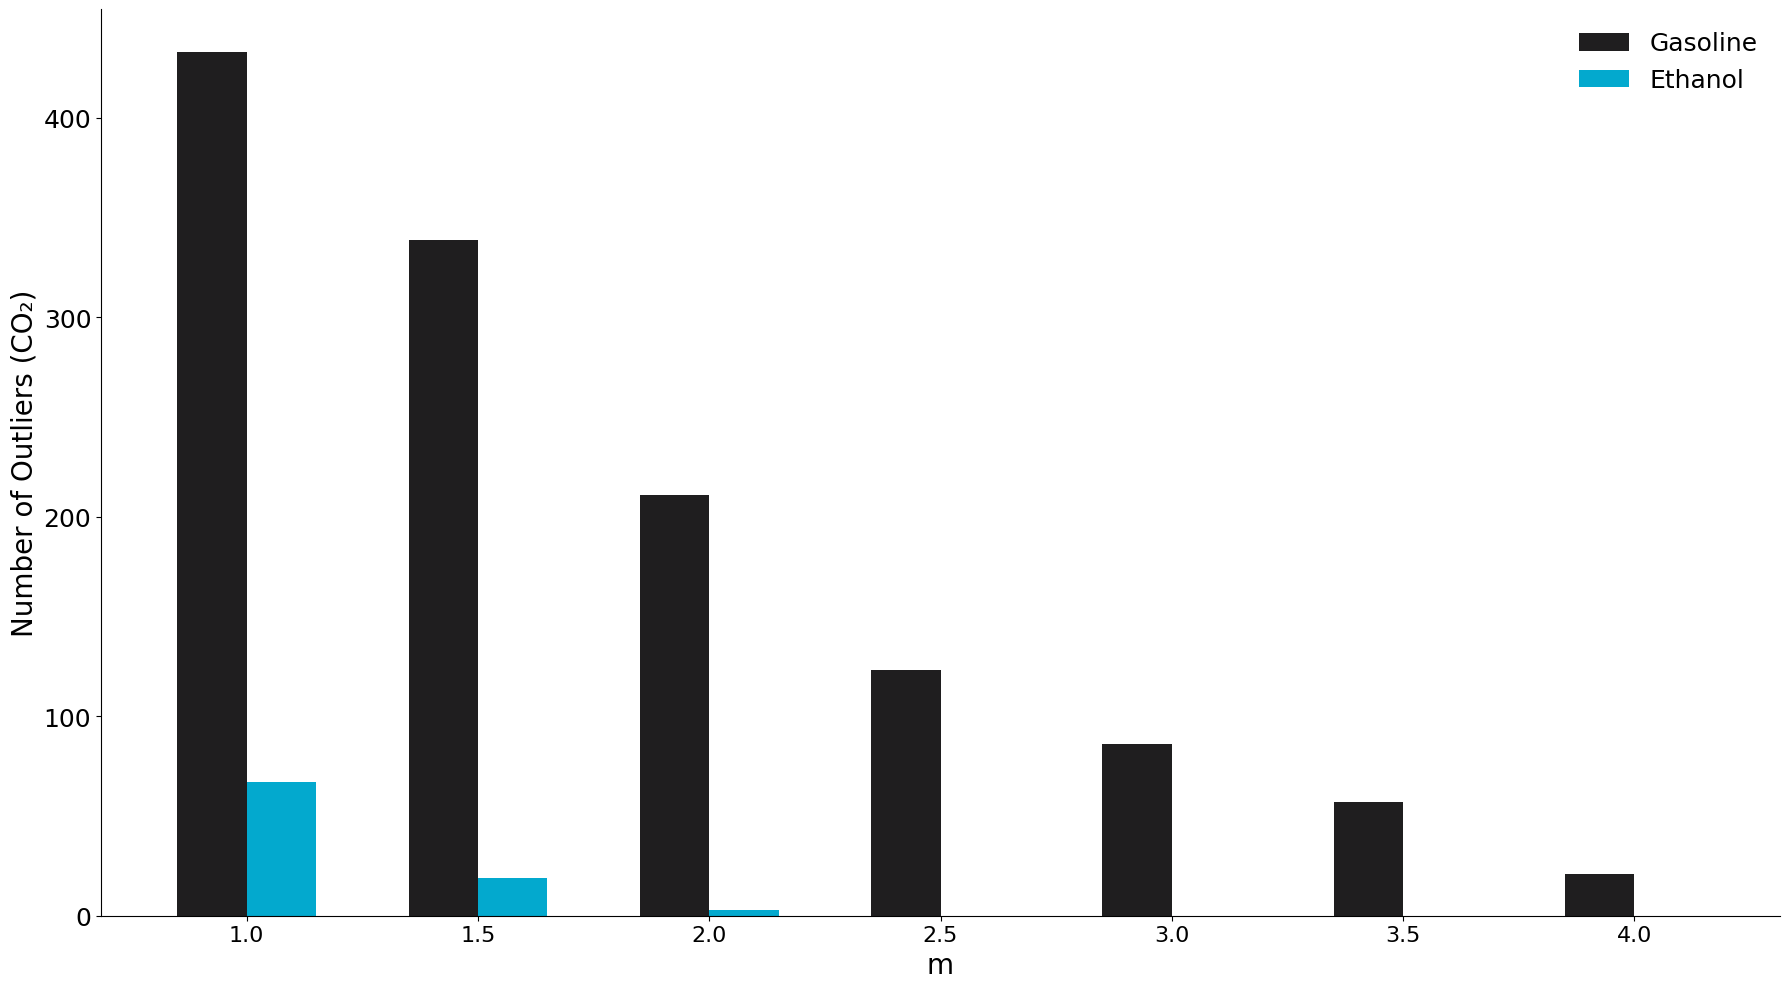

In [219]:
m_intervals = teda_results.columns.values
gasoline_m  = teda_results.loc["Gasoline", :].values
ethanol_m   = teda_results.loc["Ethanol", :].values

bar_width = 0.3

group_position = np.arange(len(m_intervals))

fig, ax = plt.subplots(figsize=plot_size)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.bar(group_position - bar_width/2, gasoline_m, bar_width, color=graph_colors["black"], label="Gasoline")
ax.bar(group_position + bar_width/2, ethanol_m, bar_width, color=graph_colors["blue"], label="Ethanol")

# plt.text(-0.25, 480, "TEDA parameter m", fontsize=26, color=text_colors["title"], weight="bold")
# plt.text(-0.25, 460, "Comparasion of the parameter m in the detection of outliers", fontsize=26, color=text_colors["subtitle"])

ax.set_ylabel("Number of Outliers (CO₂)", fontsize=20)
ax.set_xlabel("m", fontsize=20)
ax.set_xticks(group_position)
ax.set_xticklabels(m_intervals, fontsize=16)

ax.legend(frameon=False, fontsize=18)

plt.tight_layout()
plt.savefig(f"{fig_path}TEDA_parameter_m.png", dpi=300, transparent=True)

plt.show()

## TEDA with m = 1.5

In [220]:
teda_detect.run_offline(monday_gasoline,    "CO2(g/s)")
teda_detect.run_offline(tuesday_gasoline,   "CO2(g/s)")
teda_detect.run_offline(wednesday_gasoline, "CO2(g/s)")
teda_detect.run_offline(thursday_gasoline,  "CO2(g/s)")
teda_detect.run_offline(friday_gasoline,    "CO2(g/s)")

teda_detect.run_offline(monday_ethanol,    "CO2(g/s)")
teda_detect.run_offline(tuesday_ethanol,   "CO2(g/s)")
teda_detect.run_offline(wednesday_ethanol, "CO2(g/s)")
teda_detect.run_offline(thursday_ethanol,  "CO2(g/s)")
teda_detect.run_offline(friday_ethanol,    "CO2(g/s)")

Features:  CO2(g/s)
Dimensions:  1.5
Outlier value counts
is_outlier
0    1645
1     355
Name: count, dtype: int64
Features:  CO2(g/s)
Dimensions:  1.5
Outlier value counts
is_outlier
0    1615
1     385
Name: count, dtype: int64
Features:  CO2(g/s)
Dimensions:  1.5
Outlier value counts
is_outlier
0    1583
1     417
Name: count, dtype: int64
Features:  CO2(g/s)
Dimensions:  1.5
Outlier value counts
is_outlier
0    1635
1     365
Name: count, dtype: int64
Features:  CO2(g/s)
Dimensions:  1.5
Outlier value counts
is_outlier
0    1682
1     318
Name: count, dtype: int64
Features:  CO2(g/s)
Dimensions:  1.5
Outlier value counts
is_outlier
0    1986
1      14
Name: count, dtype: int64
Features:  CO2(g/s)
Dimensions:  1.5
Outlier value counts
is_outlier
0    1945
1      55
Name: count, dtype: int64
Features:  CO2(g/s)
Dimensions:  1.5
Outlier value counts
is_outlier
0    1935
1      65
Name: count, dtype: int64
Features:  CO2(g/s)
Dimensions:  1.5
Outlier value counts
is_outlier
0    1991
1

In [221]:
co2_gasoline_outliers_by_week_day = np.array([
  monday_gasoline.query("is_outlier == 1")["is_outlier"].sum(),
  tuesday_gasoline.query("is_outlier == 1")["is_outlier"].sum(),
  wednesday_gasoline.query("is_outlier == 1")["is_outlier"].sum(),
  thursday_gasoline.query("is_outlier == 1")["is_outlier"].sum(),
  friday_gasoline.query("is_outlier == 1")["is_outlier"].sum()
])

co2_ethanol_outliers_by_week_day = np.array([
  monday_ethanol.query("is_outlier == 1")["is_outlier"].sum(),
  tuesday_ethanol.query("is_outlier == 1")["is_outlier"].sum(),
  wednesday_ethanol.query("is_outlier == 1")["is_outlier"].sum(),
  thursday_ethanol.query("is_outlier == 1")["is_outlier"].sum(),
  friday_ethanol.query("is_outlier == 1")["is_outlier"].sum()
])

hm = np.array([
  co2_gasoline_outliers_by_week_day,
  co2_ethanol_outliers_by_week_day
])

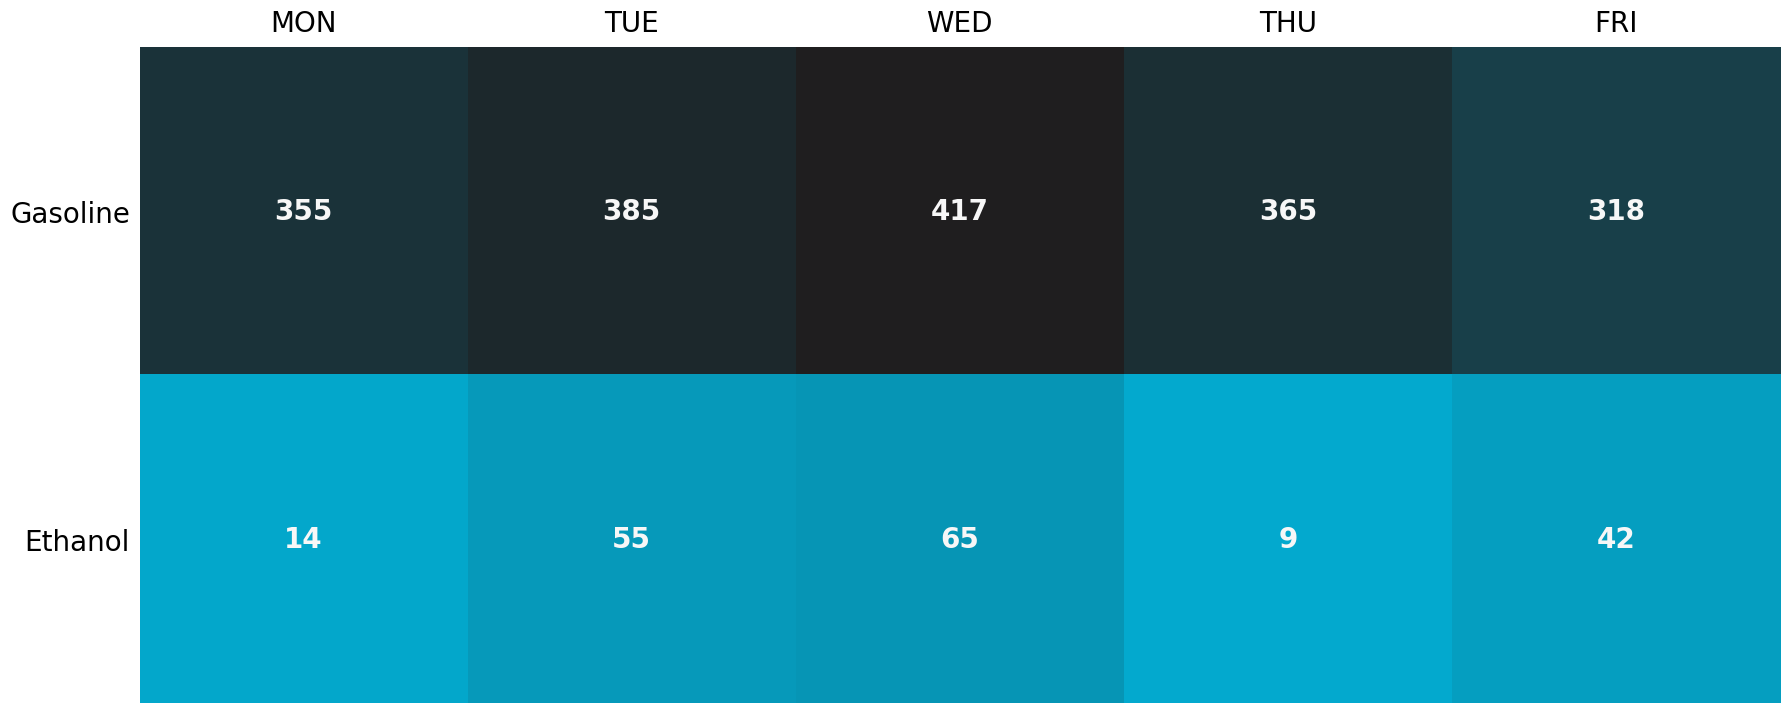

In [222]:
fig, ax = plt.subplots(figsize=plot_size)

ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

cmap = LinearSegmentedColormap.from_list("custom_colormap", [graph_colors["blue"], graph_colors["black"]])

heatmap = plt.imshow(hm, cmap=cmap)

ax.set_xticks(np.arange(hm.shape[1]))
ax.set_yticks(np.arange(hm.shape[0]))
ax.set_xticklabels(["MON", "TUE", "WED", "THU", "FRI"], fontsize=20)
ax.set_yticklabels(["Gasoline", "Ethanol"], fontsize=20)

ax.xaxis.set_ticks_position('top')

ax.tick_params(left=False, top=False)

for i in range(hm.shape[0]):
  for j in range(hm.shape[1]):
    ax.text(j, i, f"{hm[i, j]}", ha="center", va="center", color=graph_colors["white"], fontsize=20, weight="bold")

# plt.text(-0.5, -0.95, "CO₂(g) TEDA", fontsize=24, color=text_colors["title"], weight="bold")
# plt.text(-0.5, -0.80, "Number of Outliers of CO₂ detected using TEDA", fontsize=20, color=text_colors["subtitle"])

plt.tight_layout()
plt.savefig(f"{fig_path}teda_co2.png", dpi=300, transparent=True)

plt.show()

## Emissions by Week Day

In [223]:
co2_gasoline_mean_by_week_day = [
  monday_gasoline["CO2(g/s)"].mean(),
  tuesday_gasoline["CO2(g/s)"].mean(),
  wednesday_gasoline["CO2(g/s)"].mean(),
  thursday_gasoline["CO2(g/s)"].mean(),
  friday_gasoline["CO2(g/s)"].mean()
]

co2_ethanol_mean_by_week_day = [
  monday_ethanol["CO2(g/s)"].mean(),
  tuesday_ethanol["CO2(g/s)"].mean(),
  wednesday_ethanol["CO2(g/s)"].mean(),
  thursday_ethanol["CO2(g/s)"].mean(),
  friday_ethanol["CO2(g/s)"].mean()
]

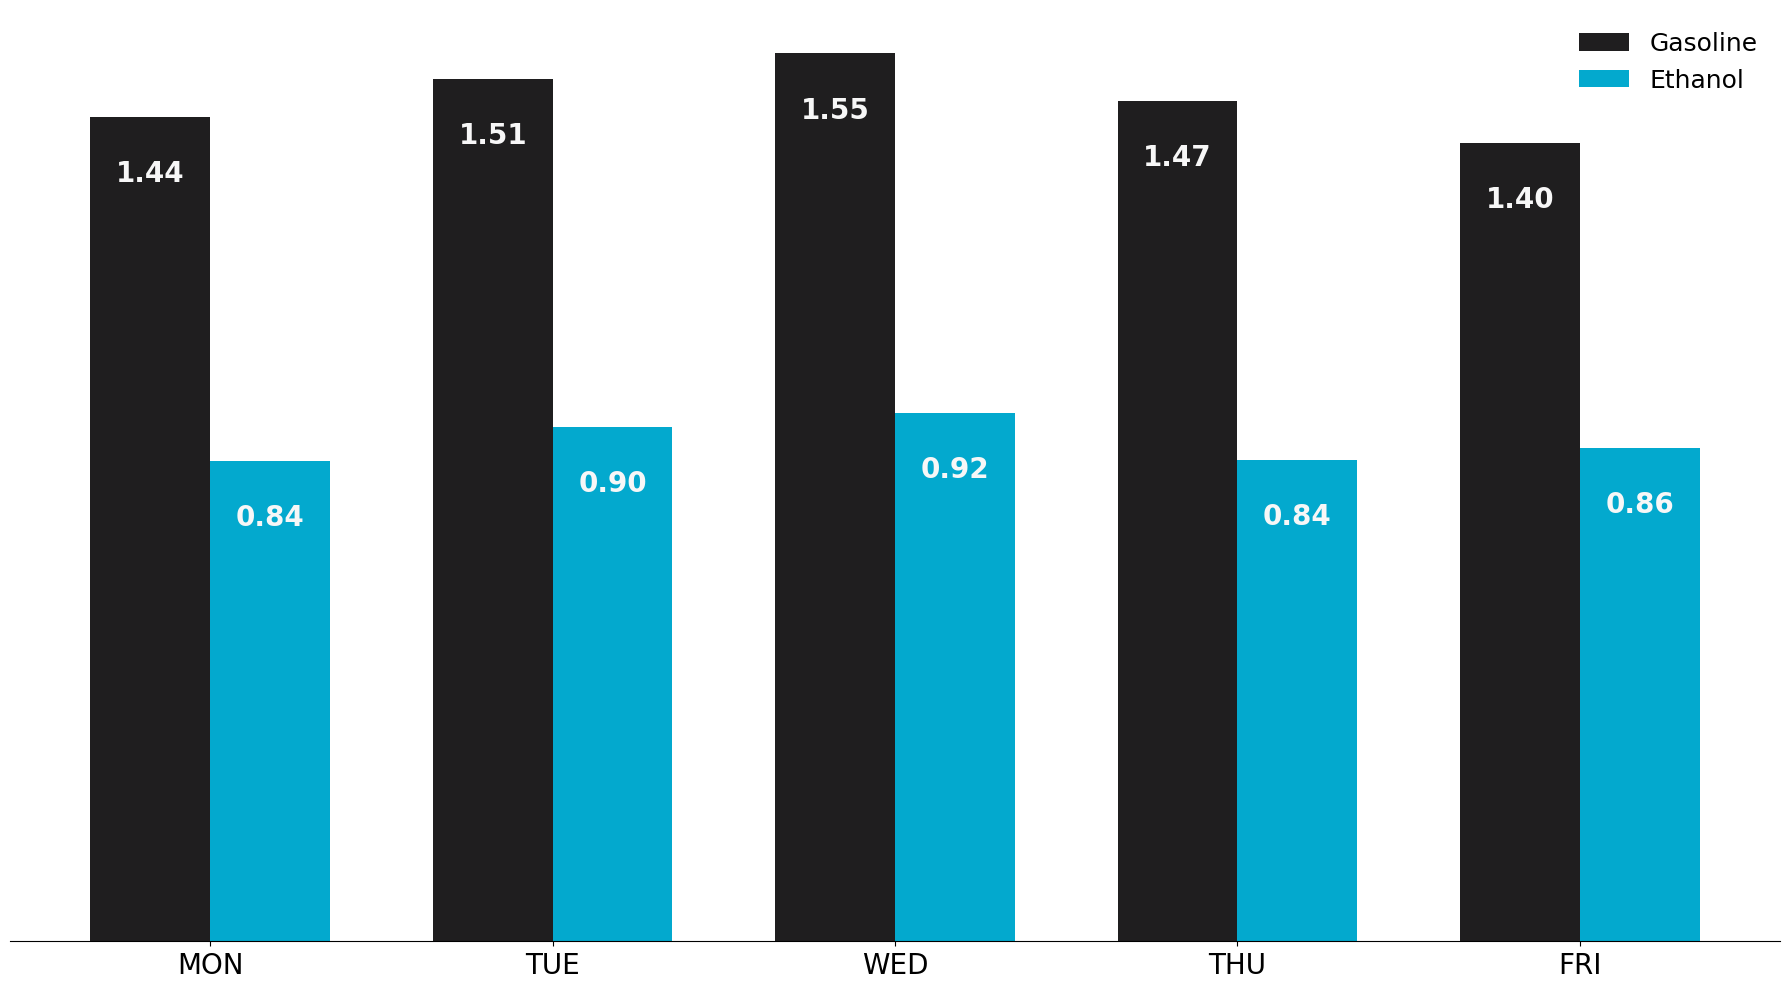

In [224]:
week_days = ["MON", "TUE", "WED", "THU", "FRI"]

bar_width = 0.35
gasoline_pos = np.arange(len(week_days))
ethanol_pos  = gasoline_pos + bar_width

fig, ax = plt.subplots(figsize=plot_size)

ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.tick_params(left = False)

group1_bar = ax.bar(gasoline_pos, co2_gasoline_mean_by_week_day, bar_width, label="Gasoline", color=graph_colors["black"])
group2_bar = ax.bar(ethanol_pos,  co2_ethanol_mean_by_week_day,  bar_width, label="Ethanol",  color=graph_colors["blue"])

ax.set_xticks(gasoline_pos + bar_width / 2)
ax.set_yticklabels([])
ax.set_xticklabels(week_days, fontsize=20)

def autolabel(barras):
    for barra in barras:
        height = barra.get_height()

        ax.annotate(
            f"{height:.2f}", weight="bold", color=graph_colors["white"], fontsize=20,
            xy=(barra.get_x() + barra.get_width() / 2, height - 0.13),
            xytext=(0, 3), textcoords="offset points", ha="center", va="bottom"
        )

autolabel(group1_bar)
autolabel(group2_bar)

# plt.text(-0.2, 1.8, "CO₂(g) Emission", fontsize=26, color=text_colors["title"], weight="bold")
# plt.text(-0.2, 1.7, "Comparative of Average CO₂ Emission per Second between Gasoline and Ethanol by Week Day", fontsize=24, color=text_colors["subtitle"])

ax.legend(frameon=False, fontsize=18)
plt.tight_layout()
plt.savefig(f"{fig_path}avg_emissions.png", dpi=300, transparent=True)
plt.show()

## Emissions Cumulative Sum

In [225]:
co2_cumsum_gasoline_mean = np.mean([
  monday_gasoline["CO2(g/s)"].cumsum(),
  tuesday_gasoline["CO2(g/s)"].cumsum(),
  wednesday_gasoline["CO2(g/s)"].cumsum(),
  thursday_gasoline["CO2(g/s)"].cumsum(),
  friday_gasoline["CO2(g/s)"].cumsum()
], axis=0)

co2_cumsum_ethanol_mean = np.mean([
  monday_ethanol["CO2(g/s)"].cumsum(),
  tuesday_ethanol["CO2(g/s)"].cumsum(),
  wednesday_ethanol["CO2(g/s)"].cumsum(),
  thursday_ethanol["CO2(g/s)"].cumsum(),
  friday_ethanol["CO2(g/s)"].cumsum()
], axis=0)

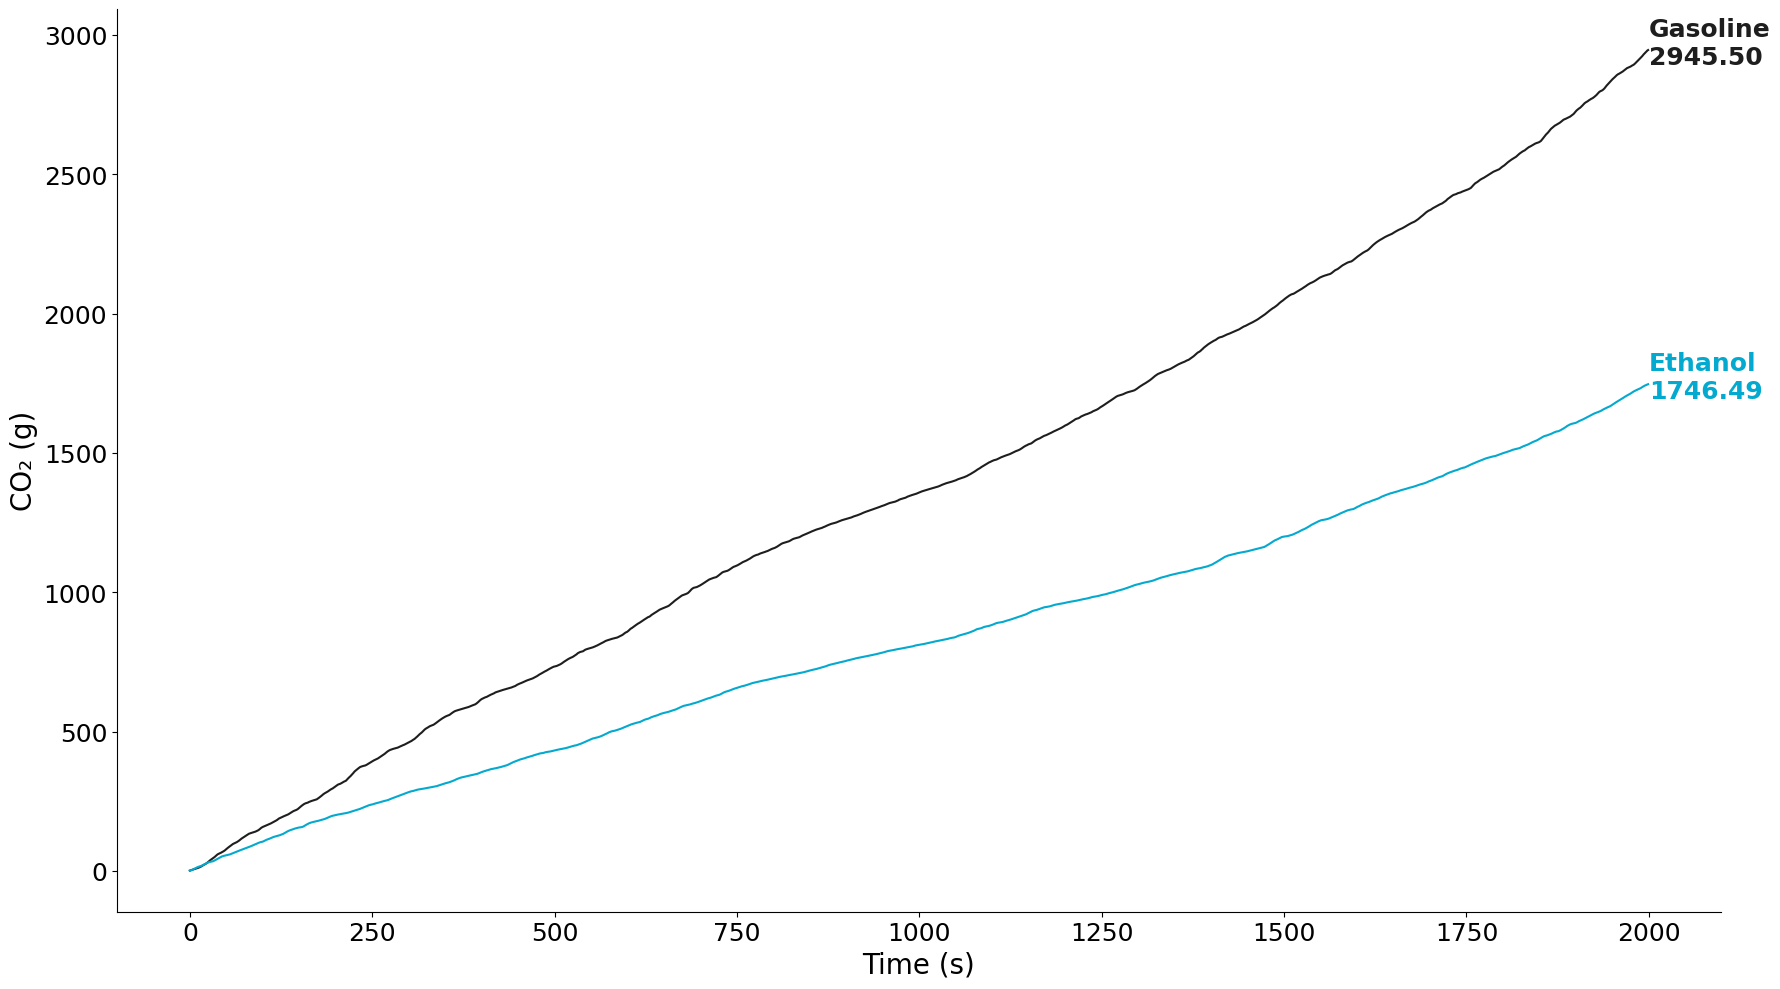

In [226]:
fig, ax = plt.subplots(figsize=plot_size)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_ylabel("CO₂ (g)", fontsize=20)
ax.set_xlabel("Time (s)", fontsize=20)

plt.xticks(rotation=0, ha="center", fontsize=18)
plt.yticks(fontsize=18)

ax.plot(co2_cumsum_gasoline_mean, color=graph_colors["black"])
ax.plot(co2_cumsum_ethanol_mean, color=graph_colors["blue"])

plt.text(2000, co2_cumsum_gasoline_mean[-1]+50, "Gasoline", weight="bold", color=graph_colors["black"], fontsize=18)
plt.text(2000, co2_cumsum_ethanol_mean[-1]+50,  "Ethanol",   weight="bold", color=graph_colors["blue"],  fontsize=18)

plt.text(2000, co2_cumsum_gasoline_mean[-1]-50, f"{co2_cumsum_gasoline_mean[-1]:.2f}", weight="bold", color=graph_colors["black"], fontsize=18)
plt.text(2000, co2_cumsum_ethanol_mean[-1]-50,  f"{co2_cumsum_ethanol_mean[-1]:.2f}",  weight="bold", color=graph_colors["blue"],  fontsize=18)

# plt.text(0, 3400, "CO₂(g) Cumulative Sum", fontsize=26, color=text_colors["title"], weight="bold")
# plt.text(0, 3200, "Comparative of Average Cumulative Sum of CO₂ Emission between Gasoline and Ethanol", fontsize=24, color=text_colors["subtitle"])

plt.tight_layout()
plt.savefig(f"{fig_path}avg_cumsum.png", dpi=300, transparent=True)

plt.show()

In [227]:
monday_gasoline["week_day"]    = "MON"
tuesday_gasoline["week_day"]   = "TUE"
wednesday_gasoline["week_day"] = "WED"
thursday_gasoline["week_day"]  = "THU"
friday_gasoline["week_day"]    = "FRI"

monday_ethanol["week_day"]    = "MON"
tuesday_ethanol["week_day"]   = "TUE"
wednesday_ethanol["week_day"] = "WED"
thursday_ethanol["week_day"]  = "THU"
friday_ethanol["week_day"]    = "FRI"

gasoline_week = pd.concat([
  monday_gasoline,
  tuesday_gasoline,
  wednesday_gasoline,
  thursday_gasoline,
  friday_gasoline
], ignore_index=True)

ethanol_week = pd.concat([
  monday_ethanol,
  tuesday_ethanol,
  wednesday_ethanol,
  thursday_ethanol,
  friday_ethanol
], ignore_index=True)

week_dict = {
  1: "MON",
  2: "TUE",
  3: "WED",
  4: "THU",
  5: "FRI"
}

palette = sns.color_palette(["#1F1E1F", "#0C1D21", "#0F3A43", "#08677C", "#03A9CE"])

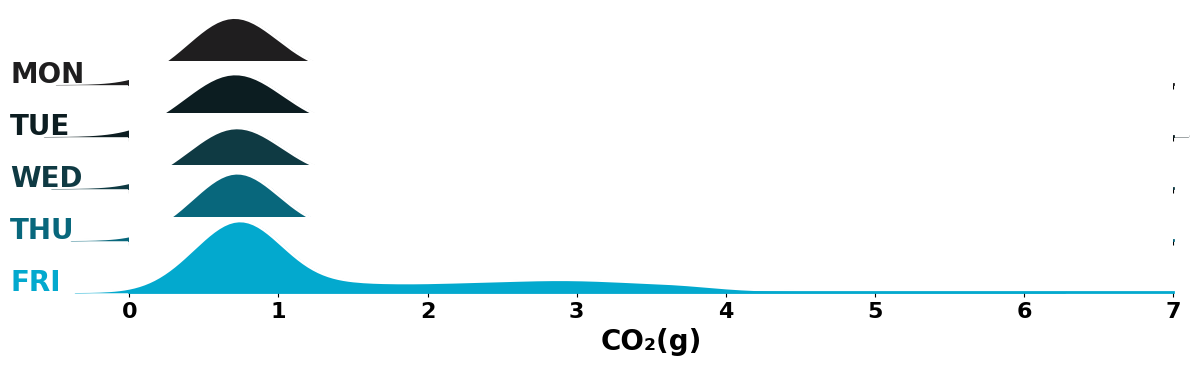

In [228]:
g = sns.FacetGrid(gasoline_week, row="week_day", hue="week_day", aspect=15, height=0.75, palette=palette)

g.map(sns.kdeplot, "CO2(g/s)", bw_adjust=1, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "CO2(g/s)", bw_adjust=1, clip_on=False, color="w", lw=2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

for i, ax in enumerate(g.axes.flat):
    ax.text(-0.8, 0.02, week_dict[i+1], fontweight="bold", fontsize=20, color=ax.lines[-1].get_color())
    

g.fig.subplots_adjust(hspace=-0.3)
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=16, fontweight="bold")
plt.xlabel("CO₂(g)", fontweight="bold", fontsize=20)
plt.xlim(0, 7)

# ax.text(-0.5, 4.5, "CO₂(g) KDE", fontsize=26, color=text_colors["title"], weight="bold")
# ax.text(-0.5, 4.0, "Kernel Density Estimate for Gasoline CO₂ Emission by Week Day", fontsize=24, color=text_colors["subtitle"])

plt.savefig(f"{fig_path}co2_kde_gasoline.png", dpi=300, transparent=True)

plt.show()

In [229]:
g = sns.FacetGrid(ethanol_week, row="week_day", hue="week_day", aspect=15, height=0.75, palette=palette)

g.map(sns.kdeplot, "CO2(g/s)", bw_adjust=1, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "CO2(g/s)", bw_adjust=1, clip_on=False, color="w", lw=2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

for i, ax in enumerate(g.axes.flat):
    ax.text(-0.8, 0.02, week_dict[i+1], fontweight="bold", fontsize=20, color=ax.lines[-1].get_color())
    

g.fig.subplots_adjust(hspace=-0.3)
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=16, fontweight="bold")
plt.xlabel("CO₂(g)", fontweight="bold", fontsize=20)
plt.xlim(0, 7)

# ax.text(-0.5, 7.8, "CO₂(g) KDE", fontsize=26, color=text_colors["title"], weight="bold")
# ax.text(-0.5, 7.0, "Kernel Density Estimate for Ethanol CO₂ Emission by Week Day", fontsize=24, color=text_colors["subtitle"])

plt.savefig(f"{fig_path}co2_kde_ethanol.png", dpi=300, transparent=True)

plt.show()

## Map Plot

In [ ]:
co2_colors = {
  '#fdff7d': 1.0,
  '#fcff33': 2.0,
  '#ffd333': 3.0,
  '#fab00f': 4.0,
  '#fa6d0f': 5.0,
  '#ff523b': 6.0
}

In [ ]:
route_map_gasoline = routeplot(monday_gasoline, "CO2(g/s)", color_list=co2_colors)

route_map_gasoline

In [ ]:
route_map_ethanol = routeplot(monday_ethanol, "CO2(g/s)", color_list=co2_colors)

route_map_ethanol